# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=' + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '&q=' + city
    print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
            # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # # If an error is experienced, skip the city
    except: 
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=2c2518ac161f49f2241222fb7d787622&q=malvan
Processing Record 1 of Set 1 | malvan
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=2c2518ac161f49f2241222fb7d787622&q=udachny
Processing Record 2 of Set 1 | udachny
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=2c2518ac161f49f2241222fb7d787622&q=adamstown
Processing Record 3 of Set 1 | adamstown
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=2c2518ac161f49f2241222fb7d787622&q=colonia
Processing Record 4 of Set 1 | colonia
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=2c2518ac161f49f2241222fb7d787622&q=huayin
Processing Record 5 of Set 1 | huayin
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=2c2518ac161f49f2241222fb7d787622&q=iquique
Processing Record 6 of Set 1 | iquique
http://api.openweathermap.org/data/2.5/weather?units

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,malvan,16.0667,73.4667,30.41,76,14,5.45,IN,1717123965
1,udachny,66.4167,112.4000,9.69,31,3,6.14,RU,1717123965
2,adamstown,-25.0660,-130.1015,21.20,73,93,9.75,PN,1717123965
3,colonia,50.9333,6.9500,12.94,72,89,1.79,DE,1717123846
4,huayin,34.5675,110.0921,30.50,30,91,2.77,CN,1717123965


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,malvan,16.0667,73.4667,30.41,76,14,5.45,IN,1717123965
1,udachny,66.4167,112.4000,9.69,31,3,6.14,RU,1717123965
2,adamstown,-25.0660,-130.1015,21.20,73,93,9.75,PN,1717123965
3,colonia,50.9333,6.9500,12.94,72,89,1.79,DE,1717123846
4,huayin,34.5675,110.0921,30.50,30,91,2.77,CN,1717123965


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

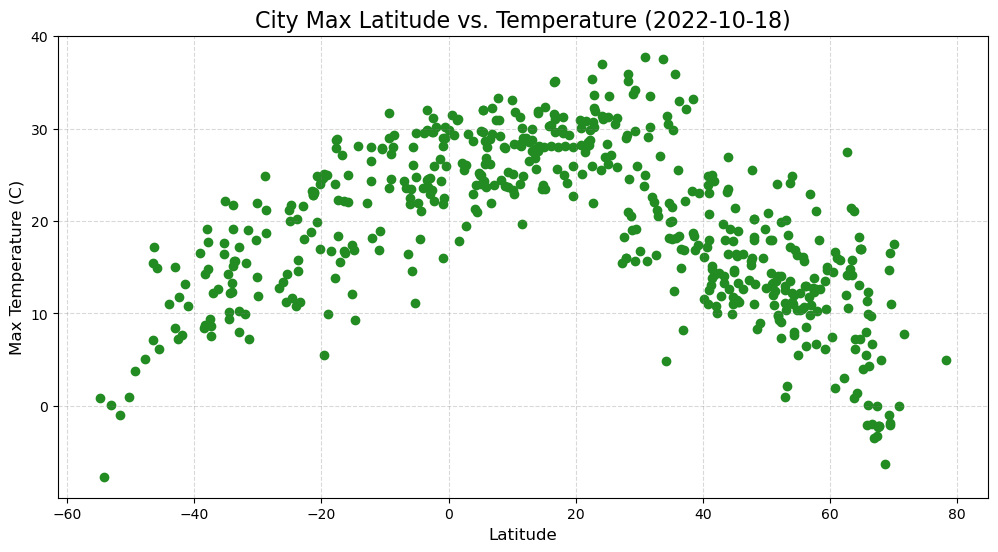

In [14]:
# Build scatter plot for latitude vs. temperature
x = city_data_df.Lat
y = city_data_df['Max Temp']

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='forestgreen')

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (C)', fontsize=12)
plt.title('City Max Latitude vs. Temperature (2022-10-18)', fontsize=16)
plt.grid(color='grey', linestyle='--', alpha=0.3)
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

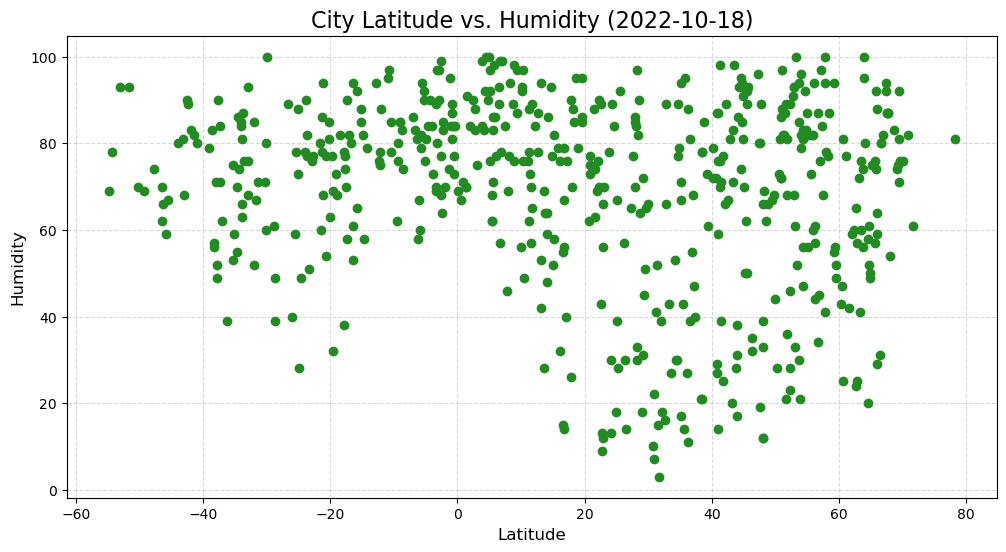

In [17]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df.Lat
y = city_data_df.Humidity

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='forestgreen')

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity', fontsize=12)
plt.title('City Latitude vs. Humidity (2022-10-18)', fontsize=16)
plt.grid(color='grey', linestyle='--', alpha=0.3)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

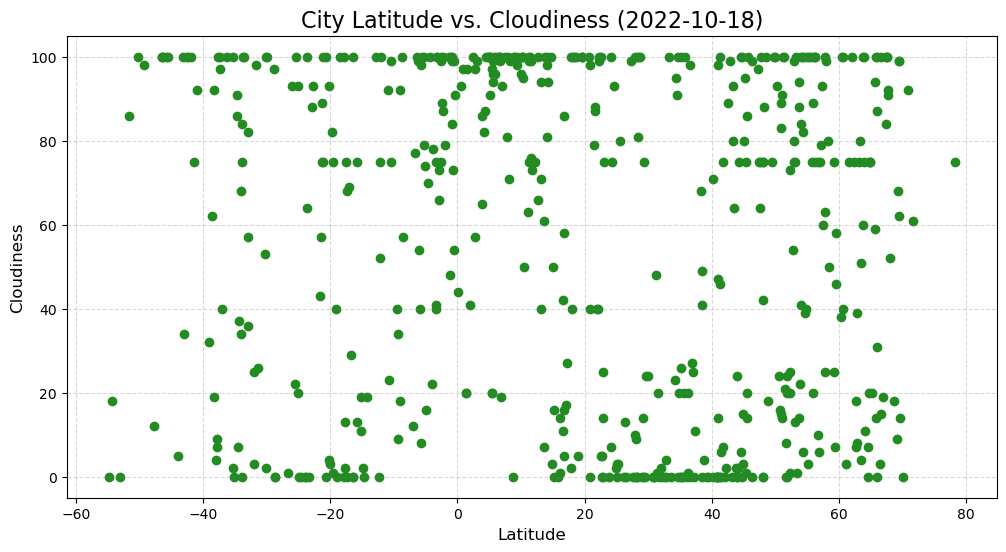

In [18]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df.Lat
y = city_data_df.Cloudiness

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='forestgreen')

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness', fontsize=12)
plt.title('City Latitude vs. Cloudiness (2022-10-18)', fontsize=16)
plt.grid(color='grey', linestyle='--', alpha=0.3)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

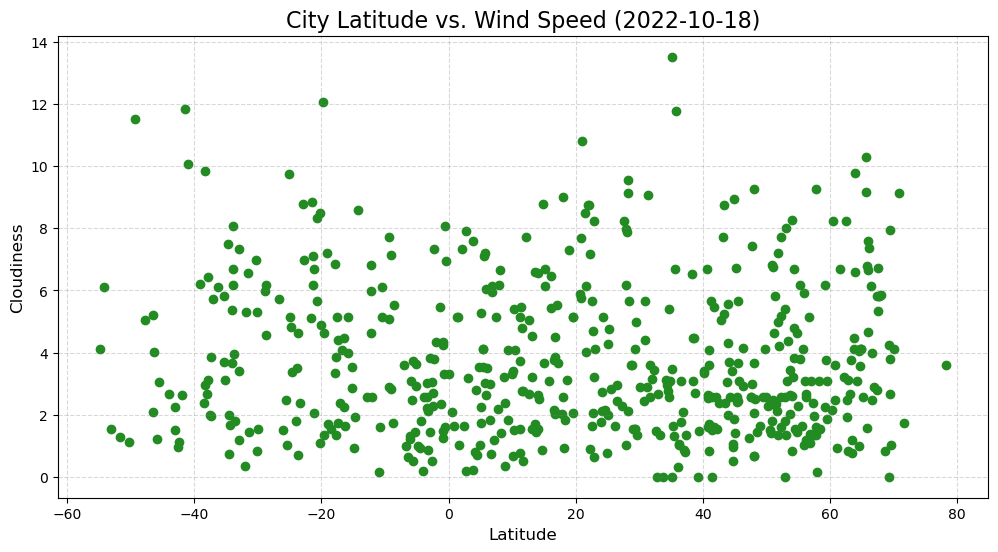

In [21]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df.Lat
y = city_data_df['Wind Speed']

plt.figure(figsize=(12,6))
plt.scatter(x, y, color='forestgreen')
# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness', fontsize=12)
plt.title('City Latitude vs. Wind Speed (2022-10-18)', fontsize=16)
plt.grid(color='grey', linestyle='--', alpha=0.3)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots
def plot_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    plt.figure(figsize=(12,6))
    #plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,malvan,16.0667,73.4667,30.41,76,14,5.45,IN,1717123965
1,udachny,66.4167,112.4000,9.69,31,3,6.14,RU,1717123965
3,colonia,50.9333,6.9500,12.94,72,89,1.79,DE,1717123846
4,huayin,34.5675,110.0921,30.50,30,91,2.77,CN,1717123965
6,vakfikebir,41.0458,39.2764,17.93,87,47,1.69,TR,1717123669


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,21.20,73,93,9.75,PN,1717123965
5,iquique,-20.2208,-70.1431,17.02,85,4,1.10,CL,1717123965
10,blackmans bay,-43.0167,147.3167,15.07,68,34,2.24,AU,1717123966
13,margaret river,-33.9500,115.0667,19.17,63,84,8.08,AU,1717123966
16,grytviken,-54.2811,-36.5092,-7.67,78,18,6.12,GS,1717123966


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6065342158322923


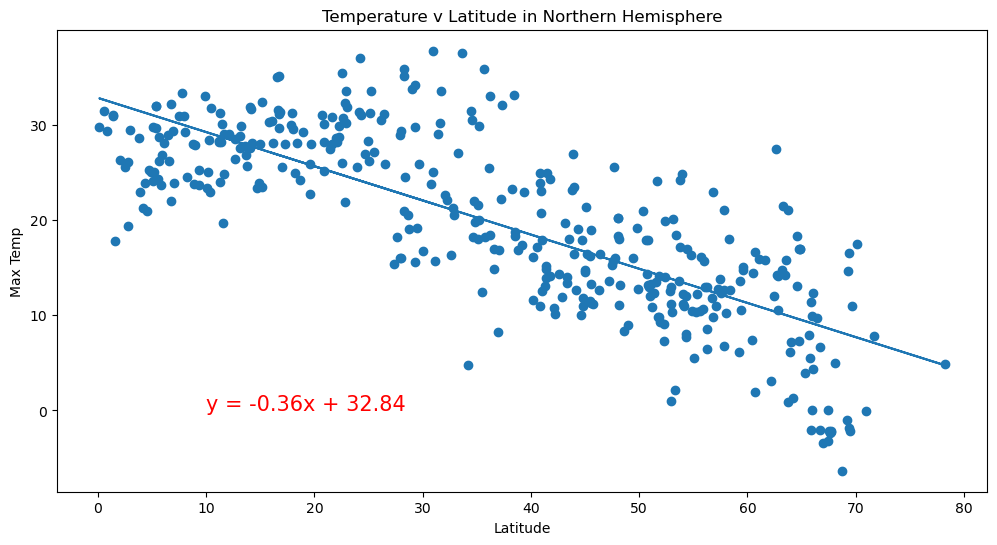

In [82]:
# Linear regression on Northern Hemisphere
plot_regression(northern_hemi_df.Lat, northern_hemi_df['Max Temp'], 'Temperature v Latitude in Northern Hemisphere', 'Max Temp', (10,0))

In [ ]:
**Discussion about the linear relationship:** There appears to be a negative relation between the Max Temperature and Latitude, meaning when the latitude increases the max  temperature of the city decreases.

The r-value is: 0.583175164199008


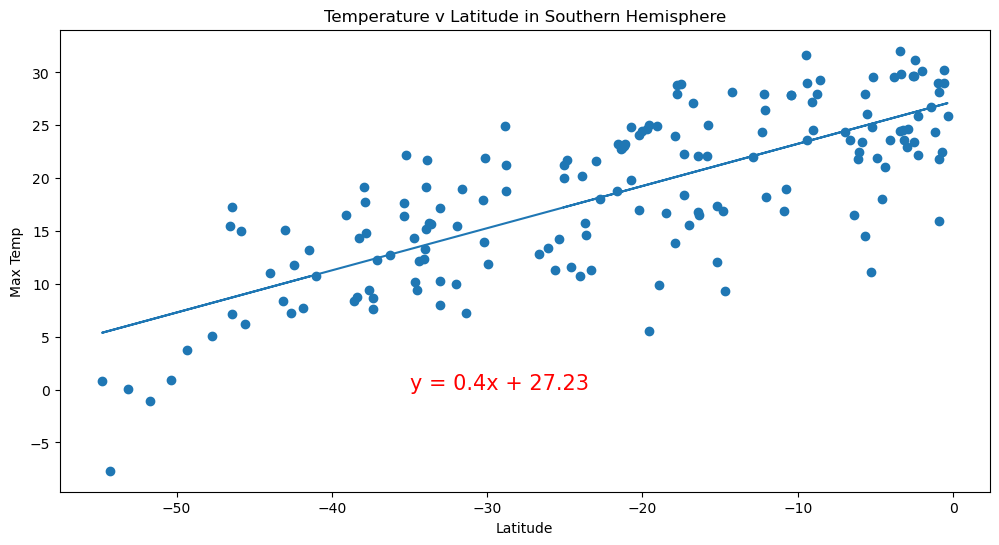

In [81]:
# Linear regression on Southern Hemisphere
plot_regression(southern_hemi_df.Lat, southern_hemi_df['Max Temp'], 'Temperature v Latitude in Southern Hemisphere', 'Max Temp', (-35,0))

**Discussion about the linear relationship:** There appears to be a positive relationship between the max temperature and latitude in the southern hemisphere, meaning that when the latitude increases the max temperature of the city increases as well.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.006130129345715841


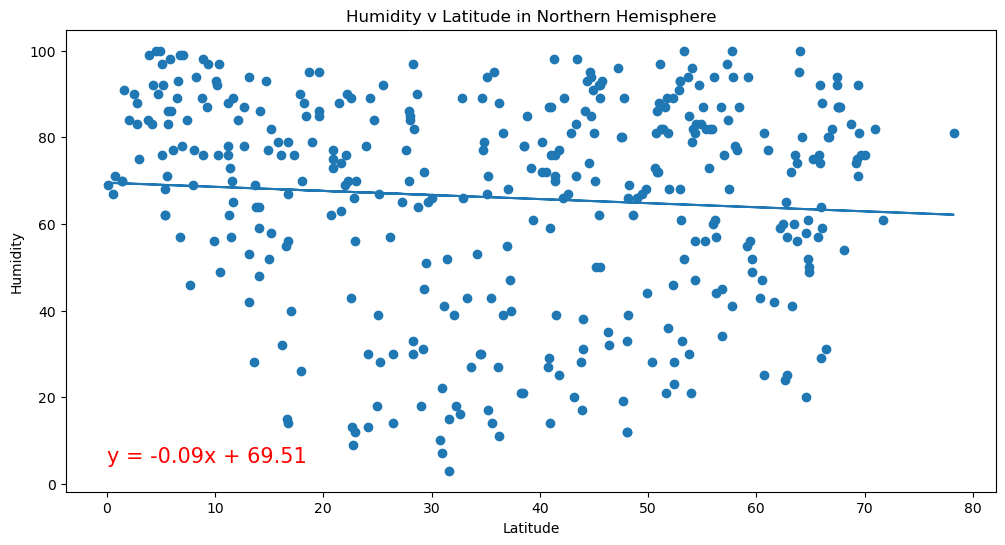

In [80]:
# Northern Hemisphere
plot_regression(northern_hemi_df.Lat, northern_hemi_df.Humidity, 'Humidity v Latitude in Northern Hemisphere', 'Humidity', (0,5))

In [ ]:
**Discussion about the linear relationship:** There doesnt appear to be a correlation between humidity and latitude due to how small the slope of the line is

The r-value is: 0.05817260735851693


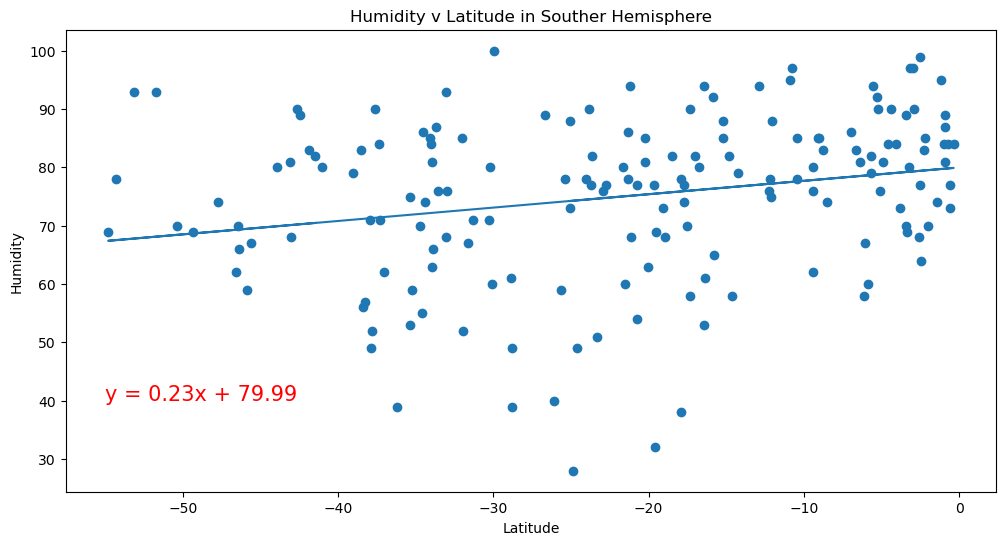

In [85]:
# Southern Hemisphere
plot_regression(southern_hemi_df.Lat, southern_hemi_df.Humidity, 'Humidity v Latitude in Souther Hemisphere', 'Humidity', (-55,40))

**Discussion about the linear relationship:** There does appear to be a small correlation between humidity and latitude due to how small the slope of the line is

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.013841970779866089


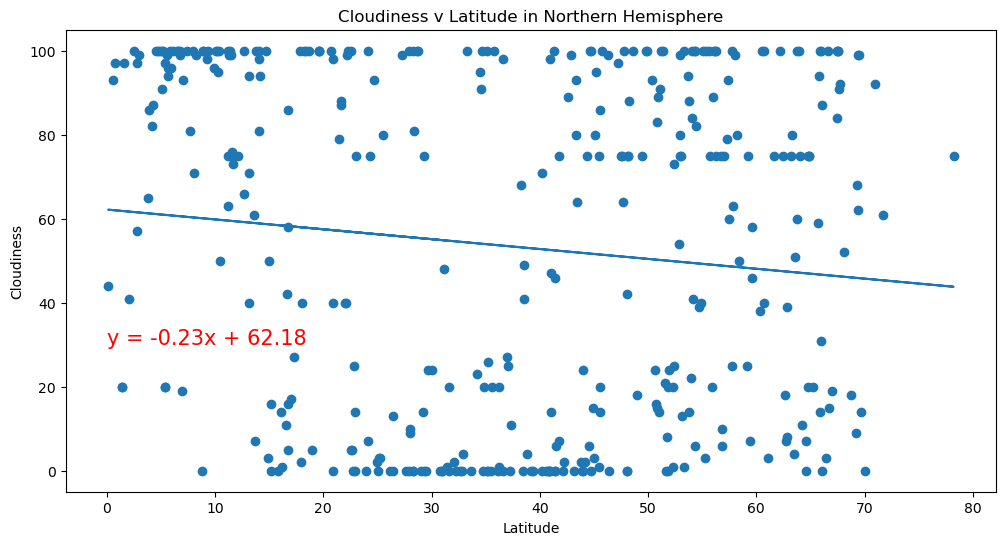

In [84]:
# Northern Hemisphere
plot_regression(northern_hemi_df.Lat, northern_hemi_df.Cloudiness, 'Cloudiness v Latitude in Northern Hemisphere', 'Cloudiness', (0,30))

In [ ]:
**Discussion about the linear relationship:** There does appear to be a small negative correlation between cloudiness and latitude in the northern hemisphere, but still nothing close to saying they are correlated

The r-value is: 0.009234396325849466


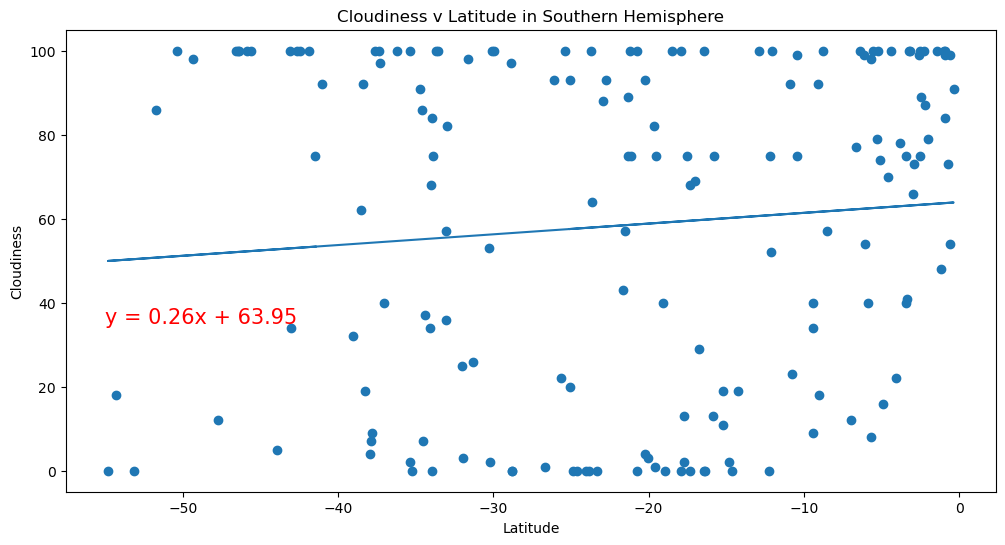

In [86]:
# Southern Hemisphere
plot_regression(southern_hemi_df.Lat, southern_hemi_df.Cloudiness, 'Cloudiness v Latitude in Southern Hemisphere', 'Cloudiness', (-55,35))

**Discussion about the linear relationship:** There does appear to be a small positive correlation between cloudiness and latitude in the southern hemisphere, but still nothing close to saying they are correlated

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0001232669912757749


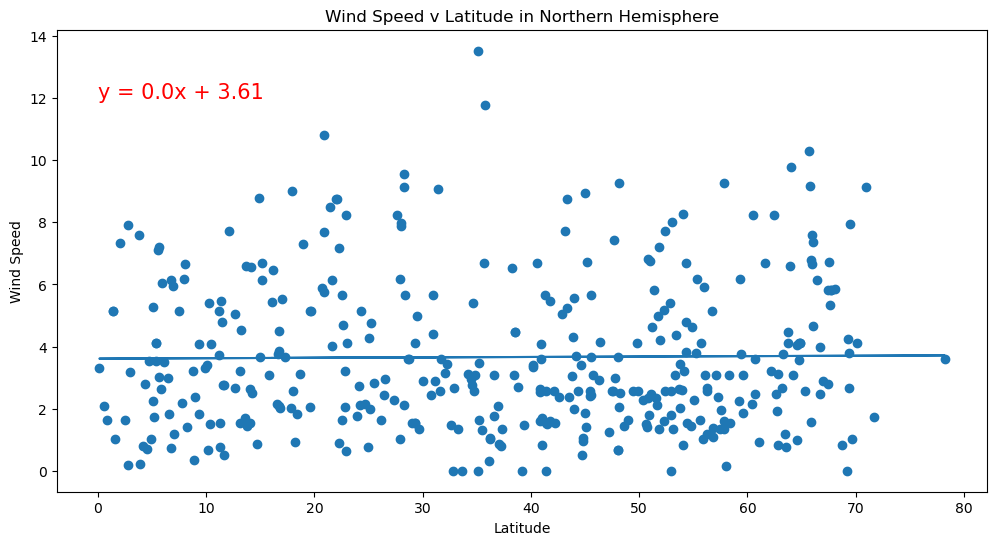

In [87]:
# Northern Hemisphere
plot_regression(northern_hemi_df.Lat, northern_hemi_df['Wind Speed'], 'Wind Speed v Latitude in Northern Hemisphere', 'Wind Speed', (0,12))

In [ ]:
**Discussion about the linear relationship:** There is NO correlation between wind speed and latitude in the norhtern hemisphere

The r-value is: 0.0001232669912757749


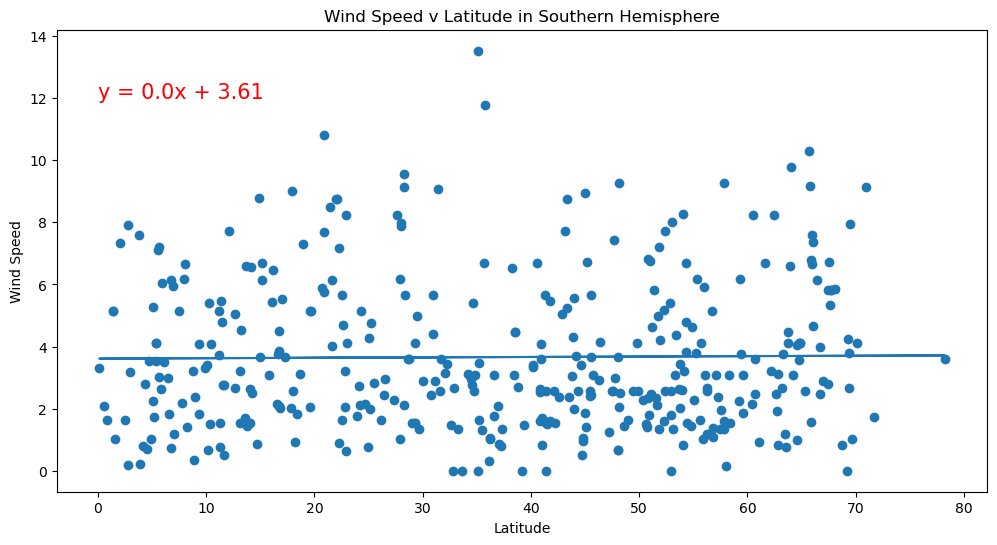

In [88]:
# Southern Hemisphere
plot_regression(northern_hemi_df.Lat, northern_hemi_df['Wind Speed'], 'Wind Speed v Latitude in Southern Hemisphere', 'Wind Speed', (0,12))

**Discussion about the linear relationship:** There is no correlation between wind speed and latitude in the southern hemisphere